<a href="https://colab.research.google.com/github/davidzapata439/Python-Prep/blob/main/Ejer_M2_T1_Plantas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Colab Notebook: Clasificación de Plantas Medicinales con CNN

# ============================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import time
import os
from google.colab import files
import zipfile
from tensorflow.keras import regularizers

In [2]:
# ============================
# 2. CARGA Y PREPROCESAMIENTO DE DATOS
# ============================
# Solicitar carga manual del archivo ZIP del dataset
print("Por favor, carga manualmente el archivo .zip del dataset.")
uploaded = files.upload()

# Descomprimir archivo zip en una carpeta específica
for file in uploaded.keys():
    dataset_dir = f"/content/{file.split('.')[0]}"
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# Directorios del dataset (ajustar manualmente si es necesario)
base_dir = os.path.join(dataset_dir, 'Dataset Tipo de Plantas')
train_dir = os.path.join(base_dir, 'Entrenamiento')
val_dir = os.path.join(base_dir, 'Validación')
test_dir = os.path.join(base_dir, 'Prueba')

# Tamaño y batch
img_size = (128, 128)
batch_size = 32

# Generadores de datos normalizados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Por favor, carga manualmente el archivo .zip del dataset.


Saving Dataset Tipo de Plantas.zip to Dataset Tipo de Plantas.zip
Found 5593 images belonging to 7 classes.
Found 706 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:
# ============================
# 3. DISEÑO DE LA CNN
# ============================
model = models.Sequential([
    # Capa 1: Convolución 2D con 32 filtros, tamaño 3x3 y activación ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),  # Pooling para reducir dimensionalidad

    # Capa 2: Más filtros para detectar características complejas
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa 3: Aumento de filtros a 128 para más profundidad
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),  # Aplanamiento para conectarse con capa densa
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),  # Capa completamente conectada
    layers.Dropout(0.5),  # Regularización para evitar overfitting
    layers.Dense(10, activation='softmax')  # Capa de salida para 10 clases
])

model.summary()  # Mostrar resumen de arquitectura del modelo

In [ ]:
# ============================
# 4. COMPILACIÓN Y ENTRENAMIENTO
# ============================
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizador Adam con tasa 0.001
              loss='categorical_crossentropy',  # Pérdida adecuada para clasificación multiclase
              metrics=['accuracy'])  # Métrica de precisión

start_time = time.time()  # Iniciar cronómetro
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stop])  # Entrenamiento por 20 épocas
history = model.fit(train_data, epochs=20, validation_data=val_data)
training_time = time.time() - start_time  # Tiempo total
print(f"\nTiempo de entrenamiento: {training_time:.2f} segundos")


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.1382 - loss: 1.9459 - val_accuracy: 0.1431 - val_loss: 1.9459
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.1378 - loss: 1.9459 - val_accuracy: 0.1431 - val_loss: 1.9459
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 224ms/step - accuracy: 0.1482 - loss: 1.9460 - val_accuracy: 0.1431 - val_loss: 1.9459
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - accuracy: 0.1396 - loss: 1.9459 - val_accuracy: 0.1431 - val_loss: 1.9459
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.1471 - loss: 1.9459 - val_accuracy: 0.1431 - val_loss: 1.9459
Epoch 6/20
  3/175 ━━━━━━━━━━━━━━━━━━━━ 51s 301ms/step - accuracy: 0.1337 - loss: 1.9455

In [16]:
# ============================
# 5. EVALUACIÓN DEL MODELO
# ============================
test_loss, test_acc = model.evaluate(test_data)  # Evaluación final
print(f"Precisión en prueba: {test_acc:.2f}")

predictions = model.predict(test_data)  # Obtener predicciones
y_pred = np.argmax(predictions, axis=1)  # Convertir de one-hot a etiquetas
y_true = test_data.classes  # Etiquetas verdaderas
class_labels = list(test_data.class_indices.keys())  # Nombres de clases

# Reporte detallado: precisión, recall, F1 por clase
print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_labels))


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.0204 - loss: 2.0965
Precisión en prueba: 0.14
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

    aloevera       0.00      0.00      0.00       100
      banana       0.00      0.00      0.00       100
     coconut       0.00      0.00      0.00       100
       mango       0.00      0.00      0.00       100
      orange       0.00      0.00      0.00       100
      papaya       0.00      0.00      0.00       100
  watermelon       0.14      1.00      0.25       100

    accuracy                           0.14       700
   macro avg       0.02      0.14      0.04       700
weighted avg       0.02      0.14      0.04       700



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


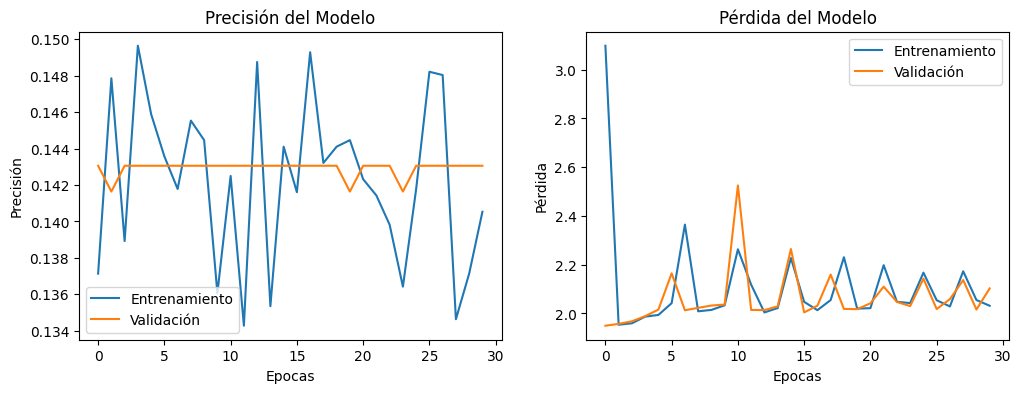

Diagnóstico: Buen ajuste


In [17]:
# ============================
# 6. VISUALIZACIÓN DE MÉTRICAS
# ============================
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Diagnóstico del modelo: overfitting, underfitting o buen ajuste
train_loss_final = history.history['loss'][-1]
val_loss_final = history.history['val_loss'][-1]

if val_loss_final > train_loss_final * 1.3:
    print("Diagnóstico: Overfitting")
elif val_loss_final < train_loss_final * 0.7:
    print("Diagnóstico: Underfitting")
else:
    print("Diagnóstico: Buen ajuste")


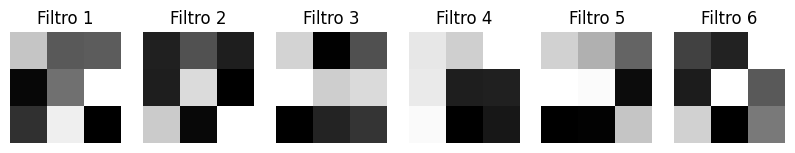

In [11]:
# ============================
# 7. VISUALIZACIÓN DE FILTROS
# ============================
first_conv_layer = model.layers[0]  # Obtener la primera capa convolucional
filters, biases = first_conv_layer.get_weights()  # Obtener filtros

# Normalizar valores para visualizar mejor
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6  # Número de filtros a mostrar
plt.figure(figsize=(10, 4))
for i in range(n_filters):
    f = filters[:, :, :, i]  # Seleccionar filtro i
    plt.subplot(1, n_filters, i + 1)
    plt.imshow(f[:, :, 0], cmap='gray')  # Mostrar un canal (RGB)
    plt.axis('off')
    plt.title(f'Filtro {i+1}')
plt.show()

# Task
Improve the Convolutional Neural Network (CNN) model's performance for medicinal plant classification by adjusting the learning rate of the Adam optimizer to a more appropriate value (e.g., 0.001), reintroducing EarlyStopping to monitor validation loss, retraining the model with these updated parameters, and then re-evaluating its performance on the test set. Finally, visualize the new training history (accuracy and loss curves) and provide a diagnostic of the model's performance, summarizing any improvements.

## Adjust Learning Rate and Add Early Stopping

### Subtask:
Modify the compilation and training cell to use a more appropriate learning rate for the Adam optimizer (e.g., 0.001) and reintroduce EarlyStopping to monitor validation loss and prevent overfitting.


**Reasoning**:
The subtask requires modifying the existing model compilation and training cell to adjust the learning rate and reintroduce EarlyStopping. This involves updating the `model.compile()` and `model.fit()` calls.



In [18]:
# ============================
# 4. COMPILACIÓN Y ENTRENAMIENTO
# ============================
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizador Adam con tasa 0.001
              loss='categorical_crossentropy',  # Pérdida adecuada para clasificación multiclase
              metrics=['accuracy'])  # Métrica de precisión

start_time = time.time()  # Iniciar cronómetro
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stop])  # Entrenamiento por 20 épocas
#history = model.fit(train_data, epochs=30, validation_data=val_data)
training_time = time.time() - start_time  # Tiempo total
print(f"\nTiempo de entrenamiento: {training_time:.2f} segundos")

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 240ms/step - accuracy: 0.1434 - loss: 1.9881 - val_accuracy: 0.1431 - val_loss: 1.9586
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 224ms/step - accuracy: 0.1437 - loss: 1.9569 - val_accuracy: 0.1431 - val_loss: 1.9520
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.1409 - loss: 1.9532 - val_accuracy: 0.1431 - val_loss: 1.9487
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 220ms/step - accuracy: 0.1435 - loss: 1.9485 - val_accuracy: 0.1431 - val_loss: 1.9472
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - accuracy: 0.1466 - loss: 1.9466 - val_accuracy: 0.1431 - val_loss: 1.9465
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.1476 - loss: 1.9460 - val_accuracy: 0.1431 - val_loss: 1.9462
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 224ms/step - accuracy: 0.1507 - loss: 1.9462 - val_accuracy: 0.1431 - val_loss: 1.9460
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.1448 - loss: 1